In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import os
train=os.listdir('/kaggle/input/skindatasets/skin/train')


In [4]:
cat2=['Melanoma Skin Cancer Nevi and Moles']


In [5]:
cat=['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']

In [6]:
def data_dictionary():
    path_train="/kaggle/input/skindatasets/skin/train/"
    path_test="/kaggle/input/dermnet/train/"
    list_train=cat#os.listdir(path_train)
    list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        print(i)
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j   
            if img_path_train!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(k)
                
        k+=1
        
    for i in list_train1:
        print(i)
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j
            #print(img_path_train)
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(4)
           
    train_df=pd.DataFrame(train_dictionary)
    print(train_df.shape)
    return  train_df

In [7]:
train=data_dictionary()


Acne and Rosacea Photos
Normal
vitiligo
Tinea Ringworm Candidiasis and other Fungal Infections
Melanoma Skin Cancer Nevi and Moles
Eczema Photos
Melanoma Skin Cancer Nevi and Moles
(7330, 2)


In [8]:
import cv2
images=[]
label=[]
for i in train['image_path']:
    if i!="/kaggle/input/skindataset/6 classes/train/Normal/34.avif":
        img=cv2.imread(i)
        img=cv2.resize(img,(180,180),interpolation=cv2.INTER_AREA)
        #img=resize_and_rescale(img)
        images.append(img)

In [9]:
label=train['target']

In [10]:
import numpy as np
import pandas as pd

In [11]:
data=np.array(images)


In [12]:
label=np.array(label)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,random_state=44)
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=1)

In [14]:
X_train.shape

(5864, 180, 180, 3)

In [15]:
X_test.shape

(1466, 180, 180, 3)

In [16]:
import keras
num_classes = 6
y_train = keras.utils.to_categorical(y_train, num_classes)

In [17]:
y_test=keras.utils.to_categorical(y_test, num_classes)

In [18]:
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Step 1: Choose a Pre-trained Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
# Step 2: Model Modification
x = base_model.output
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)


58889256/58889256 [==============================] - 0s 0us/step


In [20]:
model = Model(inputs=base_model.input, outputs=predictions)
# Step 3: Freeze Pre-trained Layers
for layer in base_model.layers:
    layer.trainable = False


In [21]:
# Step 5: Model Training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
184/184 [==============================] - 39s 132ms/step - loss: 0.6958 - accuracy: 0.7416 - val_loss: 0.4660 - val_accuracy: 0.8097
Epoch 2/30
184/184 [==============================] - 19s 104ms/step - loss: 0.2636 - accuracy: 0.9050 - val_loss: 0.4321 - val_accuracy: 0.8383
Epoch 3/30
184/184 [==============================] - 21s 113ms/step - loss: 0.1427 - accuracy: 0.9524 - val_loss: 0.4639 - val_accuracy: 0.8329
Epoch 4/30
184/184 [==============================] - 21s 115ms/step - loss: 0.0955 - accuracy: 0.9731 - val_loss: 0.4775 - val_accuracy: 0.8438
Epoch 5/30
184/184 [==============================] - 20s 111ms/step - loss: 0.0700 - accuracy: 0.9792 - val_loss: 0.5028 - val_accuracy: 0.8383
Epoch 6/30
184/184 [==============================] - 21s 117ms/step - loss: 0.0554 - accuracy: 0.9828 - val_loss: 0.5623 - val_accuracy: 0.8397
Epoch 7/30
184/184 [==============================] - 21s 115ms/step - loss: 0.0483 - accuracy: 0.9838 - val_loss: 0.5774 - val_ac

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [24]:
y_pred=model.predict(X_test)

46/46 [==============================] - 4s 85ms/step


In [25]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

array([4, 4, 4, ..., 5, 5, 2])

In [26]:
y_test=np.argmax(y_test, axis=1)

In [27]:
confusion_matrix_result=confusion_matrix(y_test,y_pred2)

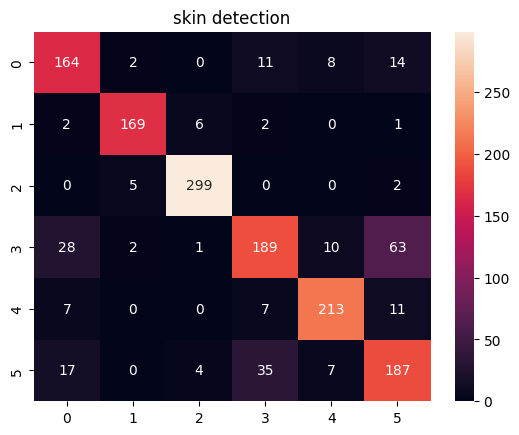

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt     
import pylab as pl
plt.title("skin detection")

ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

In [30]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [31]:
confusion_matrix=classification_report(y_test,y_pred2)

In [32]:
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.75      0.82      0.79       199
           1       0.95      0.94      0.94       180
           2       0.96      0.98      0.97       306
           3       0.77      0.65      0.70       293
           4       0.89      0.89      0.89       238
           5       0.67      0.75      0.71       250

    accuracy                           0.83      1466
   macro avg       0.83      0.84      0.83      1466
weighted avg       0.83      0.83      0.83      1466

